___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
male = pd.read_csv("ANSUR II MALE Public.csv",encoding="ISO-8859-1")
female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding="ISO-8859-1")

In [3]:
male.shape

(4082, 108)

In [4]:
female.shape

(1986, 108)

In [5]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [7]:
female.rename(columns = {'SubjectId':'subjectid'}, inplace = True)
female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [8]:
df_concated = pd.concat([male,female])
df = df_concated.copy()
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [9]:
df.shape

(6068, 108)

## Explore Data

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [11]:
df.isna().sum().any()

True

In [12]:
df.isna().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
suprasternaleheight                  0
stature                              0
span                                 0
sleeveoutseam                        0
sleevelengthspinewrist               0
sittingheight                        0
shoulderlength                       0
shoulderelbowlength                  0
shouldercircumference                0
poplitealheight                      0
thumbtipreach                        0
palmlength                           0
overheadfingertipreachsitting        0
neckcircumferencebase                0
neckcircumference                    0
mentonsellionlength                  0
lowerthighcircumference              0
lateralmalleolusheight               0
lateralfemoralepicondyleheight       0
kneeheightsitting                    0
kneeheightmidpatella     

In [13]:
categoric = df.select_dtypes(include='object')
for col in categoric.columns:
    print(col)
    print(df[col].nunique())
    print("-------------")
#categoric = df.select_dtypes(include='object')
#for col in categoric.columns:
    #print("Column", col, "has", categoric[col].nunique(), "unique values")

Gender
2
-------------
Date
253
-------------
Installation
12
-------------
Component
3
-------------
Branch
3
-------------
PrimaryMOS
285
-------------
SubjectsBirthLocation
152
-------------
Ethnicity
209
-------------
WritingPreference
3
-------------


In [14]:
df.duplicated().sum()

0

## Analyzing Features

In [15]:
df.shape

(6068, 108)

In [16]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [17]:
# I dont need subjectid feature and i will drop it 

In [18]:
df.drop("subjectid", axis = 1, inplace=True)

In [19]:
# I will protect to features about Anthropometric Data. These features are important to find DODRace.
# https://www.kaggle.com/datasets/seshadrikolluri/ansur-ii?select=ANSUR+II+Databases+Overview.pdf for Anthropometric Data

In [20]:
df.columns[1:93]
#Features about Anthropometric Data

Index(['acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth',
     

In [21]:
#Gender is important, i will save it
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [22]:
# Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12
# Date feature is not useful to predict races

In [23]:
df.Date.head()

0     4-Oct-10
1     4-Oct-10
2     4-Oct-10
3    12-Oct-10
4    12-Oct-10
Name: Date, dtype: object

In [24]:
df.drop("Date", axis = 1, inplace=True)

In [25]:
# Installation – U.S. Army installation where the measurement occurred;
# Installation feature is not useful to predict races

In [26]:
df.drop("Installation", axis = 1, inplace=True)

In [27]:
# i will decide about 'Component' and 'Branch' later after looking feature importance

In [28]:
df.Component.unique()

array(['Regular Army', 'Army National Guard', 'Army Reserve'],
      dtype=object)

In [29]:
df.Branch.unique()

array(['Combat Arms', 'Combat Support', 'Combat Service Support'],
      dtype=object)

In [30]:
# PrimaryMOS – Primary Military Occupational Specialty
# PrimaryMOS feature is not useful to predict races

In [31]:
df.drop("PrimaryMOS", axis = 1, inplace=True)

In [32]:
# Subject Birth Location; a U.S. state or foreign country

In [33]:
df.SubjectsBirthLocation.nunique()

152

In [34]:
# I will save Subject Numeric Race feature
# Subject Numeric Race; a single or multi-digit code 
# indicating a subject’s self-reported race or races (verified through interview).
# Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American,
# 6 = Pacific Islander, 8 = Other

In [35]:
df.SubjectNumericRace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351],
      dtype=int64)

In [36]:
# Ethnicity – self-reported ethnicity (verified through interview)
# There is so many null in this feature and we have similar features
# I will drop it

In [37]:
df.drop("Ethnicity", axis = 1, inplace=True)

In [38]:
# I will save Age feature

In [39]:
list_age = df.Age.unique()

In [40]:
list_age.sort()
list_age

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], dtype=int64)

In [41]:
# I will save Heightin feature

In [42]:
list_height_inch = df.Heightin.unique()

In [43]:
list_height_inch.sort()
list_height_inch

array([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 94], dtype=int64)

In [44]:
list_height_cm = list_height_inch * 2.54

In [45]:
list_height_cm.sort()
list_height_cm

array([142.24, 144.78, 147.32, 149.86, 152.4 , 154.94, 157.48, 160.02,
       162.56, 165.1 , 167.64, 170.18, 172.72, 175.26, 177.8 , 180.34,
       182.88, 185.42, 187.96, 190.5 , 193.04, 195.58, 198.12, 200.66,
       203.2 , 205.74, 218.44, 220.98, 238.76])

In [46]:
# we have same feature as a weightkg
# i will drop Weightlbs

In [47]:
df.drop("Weightlbs", axis = 1, inplace=True)

In [48]:
# i will decide about WritingPreference later

In [49]:
 df.WritingPreference.unique()

array(['Right hand', 'Left hand', 'Either hand (No preference)'],
      dtype=object)

In [50]:
df.columns[:93]

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [51]:
df.columns[93:]

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'WritingPreference'], dtype='object')

## Analyzing Target Feature

In [52]:
df = df[(df["DODRace"] == 1) | (df["DODRace"] == 2) |
                (df["DODRace"] == 3)]
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Regular Army,Combat Arms,North Dakota,1,1,41,71,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Regular Army,Combat Support,New York,1,1,35,68,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Regular Army,Combat Support,New York,2,2,42,68,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Regular Army,Combat Service Support,Wisconsin,1,1,31,66,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Regular Army,Combat Service Support,North Carolina,2,2,21,77,Right 

In [53]:
df.shape

(5769, 102)

In [54]:
df["DODRace"].unique()

array([1, 2, 3], dtype=int64)

In [55]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

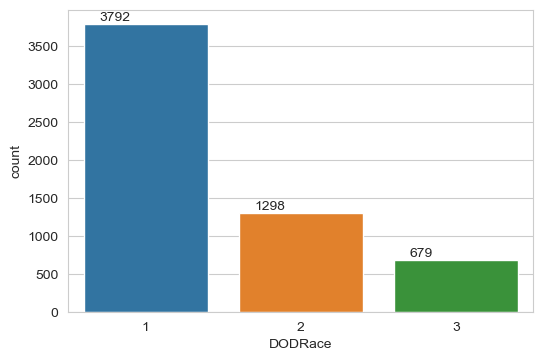

In [56]:
ax = sns.countplot(df.DODRace)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [57]:
#df["DODRace"] = df["DODRace"].apply(lambda x: 4 if x == 5 or x == 6 or x == 8 else x)
#df["DODRace"].value_counts()

In [58]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"})
   

In [59]:
df.reset_index(drop=True, inplace=True)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [60]:
df2= df.head(300)
#Because of CPU problems i will use % 5 of data

In [61]:
X = df2.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df2.DODRace

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [63]:
print("Dataframe shape      : ", X.shape)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Dataframe shape      :  (300, 156)
Train features shape :  (240, 156)
Train target shape   :  (240,)
Test features shape  :  (60, 156)
Test target shape    :  (60,)


In [64]:
scaler = StandardScaler()

In [65]:
X_train_std_scaled = scaler.fit_transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

In [66]:
scaler2 = MinMaxScaler()

In [67]:
X_train_mms_scaled = scaler2.fit_transform(X_train)
X_test_mms_scaled = scaler2.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [68]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

#### With Standard Scaler

In [70]:
log_model = LogisticRegression()

In [71]:
log_model.fit(X_train_std_scaled, y_train)

LogisticRegression()

In [72]:
eval_metric(log_model, X_train_std_scaled, y_train, X_test_std_scaled, y_test)

Test_Set
[[ 8  0  2]
 [ 0  4  4]
 [ 2  3 37]]
              precision    recall  f1-score   support

       Black       0.80      0.80      0.80        10
    Hispanic       0.57      0.50      0.53         8
       White       0.86      0.88      0.87        42

    accuracy                           0.82        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.81      0.82      0.81        60


Train_Set
[[ 42   0   0]
 [  0  30   0]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        42
    Hispanic       1.00      1.00      1.00        30
       White       1.00      1.00      1.00       168

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [73]:
model = LogisticRegression()

scores = cross_validate(model, X_train_std_scaled, y_train, scoring = ['accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy
1,0.060,0.001,0.875
2,0.060,0.001,0.917
3,0.049,0.001,0.833
4,0.059,0.001,0.708
5,0.056,0.001,0.958
6,0.062,0.001,0.833
7,0.056,0.000,0.917
8,0.067,0.001,0.958
9,0.064,0.001,0.792
10,0.071,0.001,0.875


In [74]:
df_scores.mean()[2:]

test_accuracy   0.867
dtype: float64

#### With Min-max Scaler

In [75]:
log_model2 = LogisticRegression()

In [76]:
log_model2.fit(X_train_mms_scaled, y_train)

LogisticRegression()

In [77]:
eval_metric(log_model2, X_train_mms_scaled, y_train, X_test_mms_scaled, y_test)

Test_Set
[[ 8  0  2]
 [ 1  2  5]
 [ 0  1 41]]
              precision    recall  f1-score   support

       Black       0.89      0.80      0.84        10
    Hispanic       0.67      0.25      0.36         8
       White       0.85      0.98      0.91        42

    accuracy                           0.85        60
   macro avg       0.80      0.68      0.71        60
weighted avg       0.83      0.85      0.83        60


Train_Set
[[ 39   1   2]
 [  0  21   9]
 [  0   2 166]]
              precision    recall  f1-score   support

       Black       1.00      0.93      0.96        42
    Hispanic       0.88      0.70      0.78        30
       White       0.94      0.99      0.96       168

    accuracy                           0.94       240
   macro avg       0.94      0.87      0.90       240
weighted avg       0.94      0.94      0.94       240



In [78]:
model2 = LogisticRegression()

scores = cross_validate(model2, X_train_mms_scaled, y_train, scoring = ['accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy
1,0.087,0.001,0.875
2,0.078,0.001,0.875
3,0.091,0.001,0.917
4,0.095,0.001,0.750
5,0.089,0.001,0.917
6,0.079,0.001,0.750
7,0.086,0.002,0.917
8,0.078,0.002,0.917
9,0.094,0.001,0.708
10,0.081,0.001,0.917


In [79]:
df_scores.mean()[2:]

test_accuracy   0.854
dtype: float64

### Logistic Model GridsearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
log_model = LogisticRegression(max_iter=10000, random_state=101)

In [82]:
log_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [83]:
param_grid = {
    'C': np.logspace(-1, 10, 7),
    'class_weight' : ["balanced", None],
    'penalty': ["l1", "l2", "elasticnet"],
    'solver': ['liblinear', 'lbfgs'],
}

#### With Standard Scaler

In [84]:
log_model_grid_std = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "accuracy",   
                          n_jobs = -1)

In [85]:
log_model_grid_std.fit(X_train_std_scaled,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 6.81292069e+00, 4.64158883e+02, 3.16227766e+04,
       2.15443469e+06, 1.46779927e+08, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [86]:
log_model_grid_std.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [87]:
eval_metric(log_model_grid_std, X_train_std_scaled, y_train, X_test_std_scaled, y_test)

Test_Set
[[ 9  0  1]
 [ 0  8  0]
 [ 2  5 35]]
              precision    recall  f1-score   support

       Black       0.82      0.90      0.86        10
    Hispanic       0.62      1.00      0.76         8
       White       0.97      0.83      0.90        42

    accuracy                           0.87        60
   macro avg       0.80      0.91      0.84        60
weighted avg       0.90      0.87      0.87        60


Train_Set
[[ 42   0   0]
 [  0  30   0]
 [  1   5 162]]
              precision    recall  f1-score   support

       Black       0.98      1.00      0.99        42
    Hispanic       0.86      1.00      0.92        30
       White       1.00      0.96      0.98       168

    accuracy                           0.97       240
   macro avg       0.94      0.99      0.96       240
weighted avg       0.98      0.97      0.98       240



#### With Min-max Scaler

In [88]:
log_model_grid_mms = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "accuracy",   
                          n_jobs = -1)

In [89]:
log_model_grid_mms.fit(X_train_mms_scaled,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 6.81292069e+00, 4.64158883e+02, 3.16227766e+04,
       2.15443469e+06, 1.46779927e+08, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [90]:
log_model_grid_mms.best_params_

{'C': 6.812920690579611,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [91]:
eval_metric(log_model_grid_std, X_train_mms_scaled, y_train, X_test_mms_scaled, y_test)

Test_Set
[[ 0  0 10]
 [ 0  0  8]
 [ 0  0 42]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00        10
    Hispanic       0.00      0.00      0.00         8
       White       0.70      1.00      0.82        42

    accuracy                           0.70        60
   macro avg       0.23      0.33      0.27        60
weighted avg       0.49      0.70      0.58        60


Train_Set
[[  0   0  42]
 [  0   2  28]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00        42
    Hispanic       1.00      0.07      0.12        30
       White       0.71      1.00      0.83       168

    accuracy                           0.71       240
   macro avg       0.57      0.36      0.32       240
weighted avg       0.62      0.71      0.59       240



## 2. SVC

### Vanilla SVC model 

In [92]:
from sklearn.svm import SVC

#### With Standard Scaler

In [93]:
svm_model = SVC(random_state=101)
svm_model.fit(X_train_std_scaled, y_train)

SVC(random_state=101)

In [94]:
eval_metric(svm_model, X_train_std_scaled, y_train, X_test_std_scaled, y_test)

Test_Set
[[ 4  0  6]
 [ 0  3  5]
 [ 0  0 42]]
              precision    recall  f1-score   support

       Black       1.00      0.40      0.57        10
    Hispanic       1.00      0.38      0.55         8
       White       0.79      1.00      0.88        42

    accuracy                           0.82        60
   macro avg       0.93      0.59      0.67        60
weighted avg       0.85      0.82      0.79        60


Train_Set
[[ 36   0   6]
 [  0  15  15]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      0.86      0.92        42
    Hispanic       1.00      0.50      0.67        30
       White       0.89      1.00      0.94       168

    accuracy                           0.91       240
   macro avg       0.96      0.79      0.84       240
weighted avg       0.92      0.91      0.90       240



In [95]:
model = SVC(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy
1,0.010,0.007,0.708
2,0.012,0.005,0.708
3,0.016,0.008,0.708
4,0.022,0.010,0.708
5,0.021,0.005,0.708
6,0.011,0.006,0.708
7,0.015,0.005,0.708
8,0.014,0.009,0.708
9,0.010,0.007,0.667
10,0.011,0.008,0.667


In [96]:
df_scores.mean()[2:]

test_accuracy   0.700
dtype: float64

#### With Min-Max Scaler

In [97]:
svm_model2 = SVC(random_state=101)
svm_model2.fit(X_train_mms_scaled, y_train)

SVC(random_state=101)

In [98]:
eval_metric(svm_model2, X_train_mms_scaled, y_train, X_test_mms_scaled, y_test)

Test_Set
[[ 4  0  6]
 [ 0  0  8]
 [ 0  0 42]]
              precision    recall  f1-score   support

       Black       1.00      0.40      0.57        10
    Hispanic       0.00      0.00      0.00         8
       White       0.75      1.00      0.86        42

    accuracy                           0.77        60
   macro avg       0.58      0.47      0.48        60
weighted avg       0.69      0.77      0.70        60


Train_Set
[[ 29   0  13]
 [  0   0  30]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      0.69      0.82        42
    Hispanic       0.00      0.00      0.00        30
       White       0.80      1.00      0.89       168

    accuracy                           0.82       240
   macro avg       0.60      0.56      0.57       240
weighted avg       0.73      0.82      0.76       240



In [99]:
model = SVC(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy
1,0.017,0.006,0.708
2,0.012,0.008,0.708
3,0.011,0.006,0.708
4,0.013,0.004,0.708
5,0.010,0.005,0.708
6,0.013,0.010,0.708
7,0.013,0.009,0.708
8,0.011,0.007,0.708
9,0.013,0.006,0.667
10,0.015,0.006,0.667


In [100]:
df_scores.mean()[2:]

test_accuracy   0.700
dtype: float64

###  SVC Model GridsearchCV

In [101]:
svm_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [102]:
param_grid = {'C': np.logspace(-1, 10, 7),
              'class_weight' : ["balanced", None],
              'gamma': ["scale", "auto", 0.2, 0.3],
              'kernel': ['rbf', 'linear']}

In [103]:
svm_model = SVC(max_iter=10000, random_state=101)

#### With Standart Scaler

In [104]:
svm_model_grid_std = GridSearchCV(estimator=svm_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "accuracy",   
                          n_jobs = -1)

In [105]:
svm_model_grid_std.fit(X_train_std_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=10000, random_state=101), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 6.81292069e+00, 4.64158883e+02, 3.16227766e+04,
       2.15443469e+06, 1.46779927e+08, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto', 0.2, 0.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [106]:
svm_model_grid_std.best_params_

{'C': 6.812920690579611,
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [107]:
eval_metric(svm_model_grid_std, X_train_std_scaled, y_train, X_test_std_scaled, y_test)

Test_Set
[[ 7  0  3]
 [ 2  4  2]
 [ 0  1 41]]
              precision    recall  f1-score   support

       Black       0.78      0.70      0.74        10
    Hispanic       0.80      0.50      0.62         8
       White       0.89      0.98      0.93        42

    accuracy                           0.87        60
   macro avg       0.82      0.73      0.76        60
weighted avg       0.86      0.87      0.86        60


Train_Set
[[ 42   0   0]
 [  0  30   0]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        42
    Hispanic       1.00      1.00      1.00        30
       White       1.00      1.00      1.00       168

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



#### SVC Model Feature Importance

#### With min-max Scaler

In [108]:
svm_model_grid_mms = GridSearchCV(estimator=svm_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "accuracy",   
                          n_jobs = -1)

In [109]:
svm_model_grid_mms.fit(X_train_mms_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=10000, random_state=101), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 6.81292069e+00, 4.64158883e+02, 3.16227766e+04,
       2.15443469e+06, 1.46779927e+08, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto', 0.2, 0.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [110]:
svm_model_grid_mms.best_params_

{'C': 6.812920690579611,
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [111]:
eval_metric(svm_model_grid_mms, X_train_mms_scaled, y_train, X_test_mms_scaled, y_test)

Test_Set
[[ 7  0  3]
 [ 1  5  2]
 [ 0  1 41]]
              precision    recall  f1-score   support

       Black       0.88      0.70      0.78        10
    Hispanic       0.83      0.62      0.71         8
       White       0.89      0.98      0.93        42

    accuracy                           0.88        60
   macro avg       0.87      0.77      0.81        60
weighted avg       0.88      0.88      0.88        60


Train_Set
[[ 42   0   0]
 [  0  28   2]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        42
    Hispanic       1.00      0.93      0.97        30
       White       0.99      1.00      0.99       168

    accuracy                           0.99       240
   macro avg       1.00      0.98      0.99       240
weighted avg       0.99      0.99      0.99       240



#### SVC Model Feature Importance

## 3. RF

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

### DATA Preprocessing

In [113]:
X.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,Age,Heightin,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_California,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Florida,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Romania,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_Tennessee,SubjectsBirthLocation_Texas,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,WritingPreference_Left hand,WritingPreference_Right hand
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,41,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [114]:
X.shape

(300, 156)

In [115]:
y.head(10)

0    White
1    White
2    Black
3    White
4    Black
5    White
6    Black
7    White
8    White
9    White
Name: DODRace, dtype: object

In [116]:
y.shape

(300,)

In [117]:
X2 = df2.drop("DODRace",axis=1)

In [118]:
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,SubjectNumericRace,Age,Heightin,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Regular Army,Combat Arms,North Dakota,1,41,71,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Regular Army,Combat Support,New York,1,35,68,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Regular Army,Combat Support,New York,2,42,68,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Regular Army,Combat Service Support,Wisconsin,1,31,66,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Regular Army,Combat Service Support,North Carolina,2,21,77,Right hand


In [119]:
X2.shape

(300, 101)

In [120]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [121]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,SubjectNumericRace,Age,Heightin,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,0.000,0.000,0.000,41.000,1,41,71,2.000
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,0.000,0.000,2.000,39.000,1,35,68,1.000
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,0.000,0.000,2.000,39.000,2,42,68,1.000
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,0.000,0.000,1.000,56.000,1,31,66,2.000
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,0.000,0.000,1.000,40.000,2,21,77,2.000


In [122]:
X2.shape

(300, 101)

In [123]:
X2.Branch.unique()

array([0., 2., 1.])

In [124]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=101, stratify=y)

### Vanilla RF Model

In [125]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [126]:
rf_model.fit(X2_train, y2_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [127]:
eval_metric(rf_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[ 7  0  3]
 [ 1  2  5]
 [ 0  1 41]]
              precision    recall  f1-score   support

       Black       0.88      0.70      0.78        10
    Hispanic       0.67      0.25      0.36         8
       White       0.84      0.98      0.90        42

    accuracy                           0.83        60
   macro avg       0.79      0.64      0.68        60
weighted avg       0.82      0.83      0.81        60


Train_Set
[[ 42   0   0]
 [  0  30   0]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        42
    Hispanic       1.00      1.00      1.00        30
       White       1.00      1.00      1.00       168

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [128]:
rf2_model = RandomForestClassifier(class_weight="balanced", random_state=101)
scores = cross_validate(rf2_model, X_train, y_train, scoring = ["accuracy"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy
1,0.301,0.019,0.833
2,0.358,0.027,0.792
3,0.308,0.024,0.917
4,0.340,0.026,0.750
5,0.333,0.027,0.917
6,0.332,0.025,0.833
7,0.327,0.024,0.833
8,0.338,0.057,0.833
9,0.327,0.021,0.750
10,0.351,0.030,0.833


In [129]:
df_scores.mean()[2:]

test_accuracy   0.829
dtype: float64

#### RF Model Feature Importance

In [130]:
rf_feature_imp = pd.DataFrame(index = X2.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
SubjectNumericRace,0.208
sittingheight,0.027
forearmcenterofgriplength,0.024
forearmcircumferenceflexed,0.024
radialestylionlength,0.023
forearmhandlength,0.023
handlength,0.022
hipbreadth,0.020
interpupillarybreadth,0.019
eyeheightsitting,0.018


### RF Model GridsearchCV

In [131]:
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [132]:
param_grid = {"n_estimators":[5, 10, 30, 50, 100],
              "max_depth": [None, 4, 5, 6, 7, 8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', 40, 50, 70, 90]}

In [133]:
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring = "accuracy",
                             n_jobs=-1,
                             cv = 5)

In [134]:
rf_grid_model.fit(X2_train,y2_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 40, 50, 70, 90],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [5, 10, 30, 50, 100]},
             scoring='accuracy', verbose=3)

In [135]:
rf_grid_model.best_params_

{'max_depth': 4,
 'max_features': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10}

In [136]:
eval_metric(rf_grid_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[10  0  0]
 [ 1  7  0]
 [ 0  3 39]]
              precision    recall  f1-score   support

       Black       0.91      1.00      0.95        10
    Hispanic       0.70      0.88      0.78         8
       White       1.00      0.93      0.96        42

    accuracy                           0.93        60
   macro avg       0.87      0.93      0.90        60
weighted avg       0.94      0.93      0.94        60


Train_Set
[[ 41   1   0]
 [  0  30   0]
 [  1   8 159]]
              precision    recall  f1-score   support

       Black       0.98      0.98      0.98        42
    Hispanic       0.77      1.00      0.87        30
       White       1.00      0.95      0.97       168

    accuracy                           0.96       240
   macro avg       0.92      0.97      0.94       240
weighted avg       0.97      0.96      0.96       240



## 4. XGBoost

### Vanilla XGBoost Model

In [137]:
import xgboost as xgb
from xgboost import XGBClassifier

In [138]:
xgb_model = XGBClassifier(class_weight='balanced', random_state=101)

In [139]:
xgb_model.fit(X2_train,y2_train)

XGBClassifier(class_weight='balanced', objective='multi:softprob',
              random_state=101)

In [140]:
eval_metric(xgb_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[10  0  0]
 [ 0  8  0]
 [ 0  3 39]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        10
    Hispanic       0.73      1.00      0.84         8
       White       1.00      0.93      0.96        42

    accuracy                           0.95        60
   macro avg       0.91      0.98      0.94        60
weighted avg       0.96      0.95      0.95        60


Train_Set
[[ 42   0   0]
 [  0  30   0]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        42
    Hispanic       1.00      1.00      1.00        30
       White       1.00      1.00      1.00       168

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [141]:
model = XGBClassifier(class_weight='balanced', random_state=101)

scores = cross_validate(model, X2_train, y2_train, scoring = "accuracy", cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_score
1,0.836,0.005,0.958
2,0.783,0.004,0.958
3,0.787,0.005,1.000
4,0.896,0.004,0.917
5,0.819,0.004,0.958
6,0.878,0.010,0.958
7,0.839,0.004,1.000
8,0.942,0.008,1.000
9,0.870,0.004,0.958
10,0.749,0.004,1.000


In [160]:
best_score = df_scores.mean()[2:]
best_score

test_score   0.971
dtype: float64

### XGBoost Model GridsearchCV

In [143]:
xgb_model.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity', 'class_weight'])

In [144]:
param_grid = {"n_estimators":[50, 75, 100],
              'max_depth':[2,3,5],
              "learning_rate": [0.1, 0.2, 0.3],
              "subsample":[0.6, 0.8, 1],
              "colsample_bytree":[0.6, 0.8, 1]}

In [145]:
xgb_model = XGBClassifier(class_weight='balanced', random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring="accuracy", 
                              n_jobs = -1, 
                              verbose = 2,
                              cv= 5).fit(X2_train, y2_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [146]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 2,
 'n_estimators': 50,
 'subsample': 0.6}

In [147]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 101,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'class_weight': 'balanced'}

In [148]:
eval_metric(xgb_grid_model, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[10  0  0]
 [ 1  7  0]
 [ 0  3 39]]
              precision    recall  f1-score   support

       Black       0.91      1.00      0.95        10
    Hispanic       0.70      0.88      0.78         8
       White       1.00      0.93      0.96        42

    accuracy                           0.93        60
   macro avg       0.87      0.93      0.90        60
weighted avg       0.94      0.93      0.94        60


Train_Set
[[ 42   0   0]
 [  0  30   0]
 [  0   0 168]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00        42
    Hispanic       1.00      1.00      1.00        30
       White       1.00      1.00      1.00       168

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [ ]:
I NEED TO STUDY ON SHAP AND SMOTE MORE TO UNDERSTAND SO THAT I DELETED THAT PART

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [161]:
print (best_score)

test_score   0.971
dtype: float64


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___